<a href="https://colab.research.google.com/github/AREAGAM/upgraded-adventure/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

In [51]:
from google.colab import drive
import os

# Place the dataset in your Google Drive 
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
PATH = "/content/drive/My Drive/AATeam12Doc/Training/classification2train.csv"

# Read csv from Drive
import pandas as pd
df = pd.read_csv(PATH)
df

,Target,Crime2015,Index_Multiple_Deprivation_Score,Index_Multiple_Deprivation_Rank0,Index_Multiple_Deprivation_Dec0,IncomeScore,IncomeRank,IncomeDec,EmploymentScore,EmploymentRank,EmploymentDec,Education_Score,Education_Rank,Education_Dec,Health_Deprivation_and_Disability_Score,Health_Deprivation_and_Disability_Rank,Health_Deprivation_and_Disability_Dec,Crime_Score,CriRank,Crime_Dec,Barriers_to_Housing_and_Services_Score,Barriers_to_Housing_and_Services_Rank,Barriers_to_Housing_and_Services_Dec,Environment_Score,Environment_Rank,Environment_Dec,Income_Deprivation_Affecting_Children_Score,Income_Deprivation_Affecting_Children_Rank,Income_Deprivation_Affecting_Children_Dec,Income_Deprivation_Affecting_Older_People_Score,Income_Deprivation_Affecting_Older_People_Rank,Income_Deprivation_Affecting_Older_People_Dec,Children_and_Young_People_Score,Children_and_Young_People_Rank,Children_and_Young_People_Dec,Adult_Skills_Score,Adult_Skills_Rank,Adult_Skills_Dec,Geographical_Barriers_Score,Geographical_Barriers_Rank,Geographical_Barriers_Dec,Wider_Barriers_Score,Wider_Barriers_Rank,Wider_Barriers_Dec,Indoors_Score,Inddoors_Rank,Indoors_Dec,Outdoors_Score,Outdoors_Rank,Outdoors_Dec,Total_population,Dependent Children aged 0-15: mid 2015 (excluding prisoners),Pop16_59,Pop60_,WorkPopulation
0,3,98.4,42.010,3718,2,0.292,2454,1,0.178,4427,2,20.089,13715,5,1.050,3869,2,0.011,16503,6,44.918,1077,1,26.563,10832,4,0.394,1579,1,0.544,390,1,-0.238,20020,7,0.370,9009,3,-1.297,31472,10,6.116,269,1,-0.701,26338,9,1.640,1179,1,2135,501,1479,155,1460.25
1,0,83.9,18.273,15898,5,0.138,11632,4,0.099,12685,4,7.462,24523,8,-0.105,17651,6,-0.205,19688,6,28.640,7939,3,17.807,16974,6,0.199,10112,4,0.109,18742,6,-0.519,24174,8,0.238,23090,8,-0.198,19221,6,3.070,4240,2,-0.413,22720,7,0.721,6309,2,1313,278,744,291,758.00
2,0,56.3,10.621,23751,8,0.048,26762,9,0.040,27831,9,1.711,31198,10,-1.472,31610,10,0.498,9108,3,33.776,4693,2,21.694,14047,5,0.063,25109,8,0.061,26973,9,-1.329,31312,10,0.168,29629,10,0.563,7241,3,1.901,7224,3,0.131,14438,5,0.407,9410,3,1546,257,856,433,886.25
3,0,34.1,34.411,6100,2,0.244,4290,2,0.184,4047,2,34.644,6886,3,0.348,11001,4,-0.773,27037,9,34.543,4301,2,17.064,17531,6,0.256,6588,3,0.279,5543,2,0.916,4413,2,0.349,10812,4,-0.040,16373,5,3.801,2839,1,0.019,16157,5,0.078,14032,5,1318,349,771,198,769.50
4,0,56.5,30.622,7727,3,0.228,5081,2,0.145,7066,3,15.999,16583,6,0.410,10199,4,-0.329,21449,7,39.438,2363,1,21.689,14050,5,0.288,4962,2,0.270,5927,2,0.049,15259,5,0.290,17128,6,-0.448,23247,8,4.918,1086,1,-0.467,23481,8,1.120,3377,2,1730,324,1077,329,1063.25
5,1,127.4,36.498,5376,2,0.286,2693,1,0.203,3006,1,26.280,10165,4,0.247,12393,4,-0.306,21134,7,27.256,9026,3,26.967,10567,4,0.318,3683,2,0.341,3259,1,-0.018,16397,5,0.408,6266,2,-1.148,30776,10,3.779,2887,1,-0.790,27246,9,1.706,998,1,1685,408,985,292,968.50
6,3,86.6,37.724,4966,2,0.273,3106,1,0.166,5237,2,28.090,9363,3,0.675,7130,3,0.797,5456,2,28.088,8356,3,23.771,12586,4,0.321,3584,2,0.439,1229,1,0.017,15781,5,0.421,5508,2,-0.866,28642,9,3.781,2882,1,-0.830,27605,9,1.485,1681,1,2862,608,1819,435,1784.25
7,0,240.9,35.297,5784,2,0.194,7028,3,0.097,13081,4,10.210,21626,7,0.643,7462,3,0.895,4435,2,52.994,107,1,40.129,4227,2,0.347,2698,1,0.489,733,1,-0.115,17995,6,0.228,24303,8,-0.313,21114,7,6.671,83,1,0.454,9812,3,1.556,1443,1,2362,344,1825,193,1843.00
8,1,188.8,28.652,8678,3,0.211,6029,2,0.136,7833,3,22.260,12370,4,-0.121,17907,6,-1.317,31059,10,39.900,2217,1,28.979,9397,3,0.209,9458,3,0.322,3885,2,0.338,10914,4,0.321,13658,5,-1.167,30865,10,5.361,672,1,-0.604,25218,8,1.769,849,1,1121,229,692,200,683.00
9,0,281.4,43.021,3478,2,0.304,2074,1,0.232,1823,1,14.852,17460,6,0.624,7667,3,-0.222,19930,7,42.535,1532,1,26.176,11055,4,0.316,3745,2,0.444,1171,1,-0.221,19734,7,0.312,14664,5,-0.360,21884,7,5.193,799,1,-0.909,28272,9,1.689,1042,1,1739,390,1087,262,1081.75


In [75]:
list=("Crime2015","Index_Multiple_Deprivation_Score")
print(list)

('Crime2015', 'Index_Multiple_Deprivation_Score')


In [78]:
# Organise data
df_np = df.to_numpy()


label_names = ['tpye0','type1','type2','type3']

labels = np.array(df['Target'])

feature_names = df[df.columns.values]

features = df_np

"""
print('Class label = ', labels[0])
print(features[0])
"""
print(labels)
print(df['Target'])
print(df_np)

[3 0 0 0 0 1 3 0 1 0 0 2 1 0 1 1 0 0 0 1 1 1 0 2 0 0 0 0 1 1 0 3 1 0]
0     3
1     0
2     0
3     0
4     0
5     1
6     3
7     0
8     1
9     0
10    0
11    2
12    1
13    0
14    1
15    1
16    0
17    0
18    0
19    1
20    1
21    1
22    0
23    2
24    0
25    0
26    0
27    0
28    1
29    1
30    0
31    3
32    1
33    0
Name: Target, dtype: int64
[[3.00000e+00 9.84000e+01 4.20100e+01 ... 1.47900e+03 1.55000e+02
  1.46025e+03]
 [0.00000e+00 8.39000e+01 1.82730e+01 ... 7.44000e+02 2.91000e+02
  7.58000e+02]
 [0.00000e+00 5.63000e+01 1.06210e+01 ... 8.56000e+02 4.33000e+02
  8.86250e+02]
 ...
 [3.00000e+00 9.90000e+02 3.02000e+01 ... 1.19900e+03 3.35000e+02
  1.25875e+03]
 [1.00000e+00 1.21210e+03 1.42520e+01 ... 1.61500e+03 2.12000e+02
  1.65350e+03]
 [0.00000e+00 1.30900e+02 2.12960e+01 ... 1.52300e+03 2.81000e+02
  1.52750e+03]]


In [79]:
train, test, train_labels, test_labels = train_test_split(features,
                                                          labels,
                                                          test_size=0.25, # 0.25 by default, here set to train : test = 2 : 1
                                                          random_state=27) # Initialise pseudo random

In [80]:
# Initialise Naive Bayes classifier 
gnb = GaussianNB()

# Train the classifier
model = gnb.fit(train, train_labels)

# Make predictions
preds = gnb.predict(test)
print(preds)
print(int(len(preds)))

[1 0 1 1 0 1 0 0 3]
9


In [81]:
print(accuracy_score(test_labels, preds))
# Evaluate accuracy

0.3333333333333333


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


ValueError: ignored

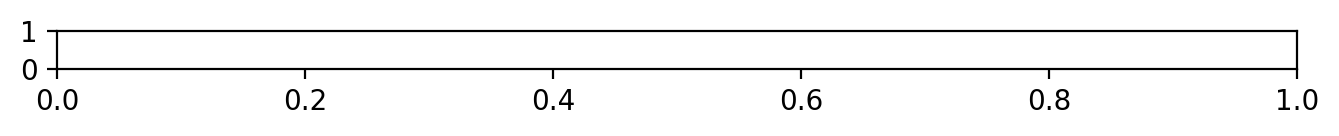

In [82]:
# Visualise predictions
plt.figure(figsize=(8, 0.25), dpi=200)

pos_x = []
for i in range(0, 24):
  pos_x.append(i)

pos_y = [0]*24
print(pos_y)

plt.scatter(pos_x, pos_y, marker="|", c=preds.reshape(1, -1))
plt.pcolormesh(preds.reshape(1, -1), cmap='cool')
plt.axis('on')
plt.show()

In [10]:
check = 19 #@param{type:"slider", min:0, max:187, step:1}
preds[check]

if preds[check] == 1:
  print("GI") # Benign, good
else:
  print("HH") # Malignant, bad

HH
